# **Stoke Dataset SVM x Decision Trees x Random Forest Performance Comparison**
by Dominador G. Dano Jr.

## **Dataset Description**

In [236]:
import pandas as pd

data = pd.read_csv('stroke.csv')
data_raw = data
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [237]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## **Duplicate Column Detection**

In [238]:
from library.preprocess import find_duplicate_columns

find_duplicate_columns(data)

'No duplicate columns found'

## **Duplicate Row Detection**
No rows were returned in checking for duplicate rows, hence no rows are duplicate

In [239]:
from library.preprocess import check_duplicate_rows

check_duplicate_rows(data)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


## **Dropping Unique Columns**
id column is dropped

In [240]:
data = data.drop(columns=['id'])
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **NaN/Missing Values Detection**
201 missing values was detected on "bmi" column

In [241]:
from library.preprocess import count_missing_values

count_missing_values(data)

,Column,Missing Values
0,gender,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,ever_married,0
5,work_type,0
6,Residence_type,0
7,avg_glucose_level,0
8,bmi,201
9,smoking_status,0


## **Filling Missing Values with Linear Regression**

In [242]:
from library.impute import fill_missing_values

data = fill_missing_values(data)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,30.441695,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,33.546974,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


## **Double Checking for missing values**
It is shown that the data set contains no missing values after applying imputation with Linear Regression

In [243]:
count_missing_values(data)

,Column,Missing Values
0,gender,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,ever_married,0
5,work_type,0
6,Residence_type,0
7,avg_glucose_level,0
8,bmi,0
9,smoking_status,0


## **Outlier Detection for Age column**
No outliers detected for age column


Outliers detected using IQR method in column 'age':
Series([], Name: age, dtype: float64)


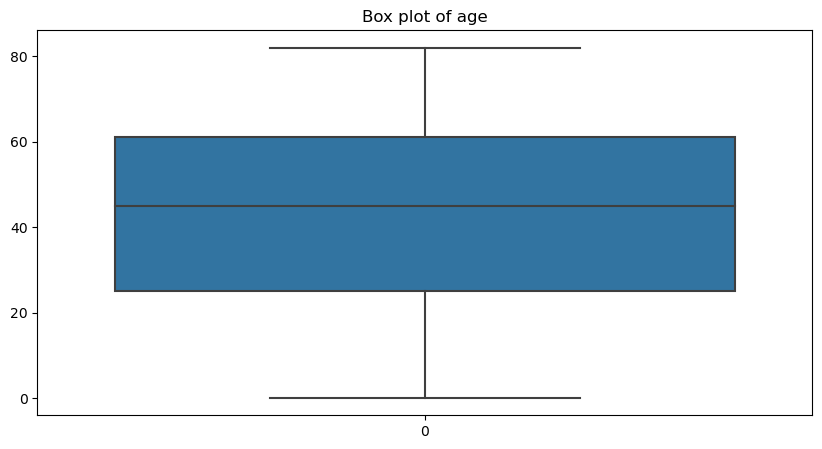

Series([], Name: age, dtype: float64)

In [244]:
from library.preprocess import detect_outliers, detect_outliers_and_plot
detect_outliers(data, 'age')

# detect_outliers_and_plot(data, 'age')

## **Outlier Detection for BMI column**
IQR outlier detection for continuous columns


Outliers detected using IQR method in column 'bmi':
2128    97.6
4209    92.0
Name: bmi, dtype: float64


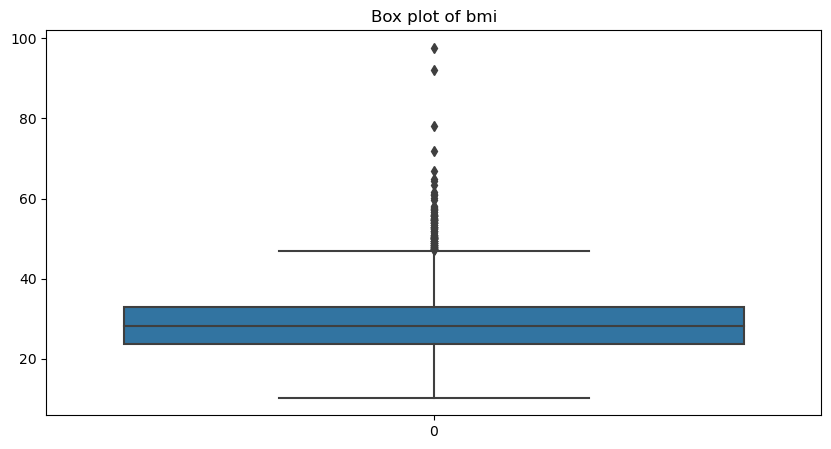

2128    97.6
4209    92.0
Name: bmi, dtype: float64

In [245]:
from library.preprocess import detect_outliers
detect_outliers(data, 'bmi')

## **What methods will be used for feature selection?**
X vs Y feature selection
- > **Chi Square Test** will be utilized for X vs Y feature selection, but this will require for continuous columns to be binned
- > Anova - although it is suited for continuos X and non-binary categorical Y, **it is not fit for binary classification**

X vs X (multicollinearity) feature selection
- > Cramer's V will be utilized

## **Binning and Label Encoding**
Data is binned to be used for feature selection, since Chi Square Test and Cramer's V requires the columns to be categorical

### Identifying Min and Max value for Age column

In [246]:
from library.preprocess import get_min_max

get_min_max(data, 'age')

,Statistic,Value
0,Minimum,0.08
1,Maximum,82.00


### Identifying Min and Max value for avg_glucose_level column

In [247]:
get_min_max(data, 'avg_glucose_level')

,Statistic,Value
0,Minimum,55.12
1,Maximum,271.74


### Identifying Min and Max value for BMI column

In [248]:
get_min_max(data, 'bmi')

,Statistic,Value
0,Minimum,10.3
1,Maximum,97.6


In [249]:
# Manually bin columns
import numpy as np


age_bins = np.linspace(0.07, 83, 5) 
bmi_bins = np.linspace(10.2, 97.7, 6)
glucose_bins = np.linspace(55.11, 271.75, 5)

binned_age = pd.cut(data["age"],
            age_bins,
            labels=['1', '2', '3', '4'])

binned_glucose = pd.cut(data["avg_glucose_level"],
            glucose_bins,
            labels=['1', '2', '3', '4'])


binned_bmi =  pd.cut(data["bmi"],
            bmi_bins,
            labels=['1', '2', '3', '4', '5'])



# Label encode all columns except manually binned 
from library.bin import label_encode_all
data = label_encode_all(data, exclude_columns=['age','avg_glucose_level', 'bmi'])

# Replace the original columns
data['age'] = binned_age
data['avg_glucose_level'] = binned_glucose
data['bmi'] = binned_bmi

# Show new data
data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,4,0,1,1,2,1,4,2,1,1
1,0,3,0,0,1,3,0,3,2,2,1
2,1,4,0,1,1,2,0,1,2,2,1
3,0,3,0,0,1,2,1,3,2,3,1
4,0,4,1,0,1,3,0,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,4,1,0,1,2,1,1,2,2,0
5106,0,4,0,0,1,3,1,2,2,2,0
5107,0,2,0,0,1,3,0,1,2,2,0
5108,1,3,0,0,1,2,0,3,1,1,0


## **Feature Selection**

## X vs Y Feature Selection for Categorical Columns using Chi Square Test

In [250]:
from library.feature_selection import Classification

# Classification.perform_anova(data, 'stroke',  independent_vars=['age','bmi'])
Classification.chi2_feature_significance(data, "stroke", significance_threshold=0.05)

,Feature,Significance,p-value
1,age,Significant,0.0
7,avg_glucose_level,Significant,0.0
3,heart_disease,Significant,0.0
2,hypertension,Significant,0.0
4,ever_married,Significant,0.0
5,work_type,Significant,0.0
9,smoking_status,Significant,0.000002
8,bmi,Significant,0.001794
6,Residence_type,Not Significant,0.298332
0,gender,Not Significant,0.789549


## X vs X Feature Selection Using Cramer's V

Cramér's V is a measure of association between two categorical variables. It's based on the chi-square statistic and ranges from 0 to 1, with 0 indicating no association and 1 indicating a perfect association.

Cramer's V Coefficient • *source: IBM - https://www.ibm.com/docs/en/cognos-analytics/12.0.0?topic=terms-cramrs-v*

- > <= 0.2 - The result is weak. Although the result is statistically significant, the fields are only weakly associated.

- > <= 0.6 - The result is moderate. The fields are moderately associated.

- > 0.6 and above - The result is strong. The fields are strongly associated.


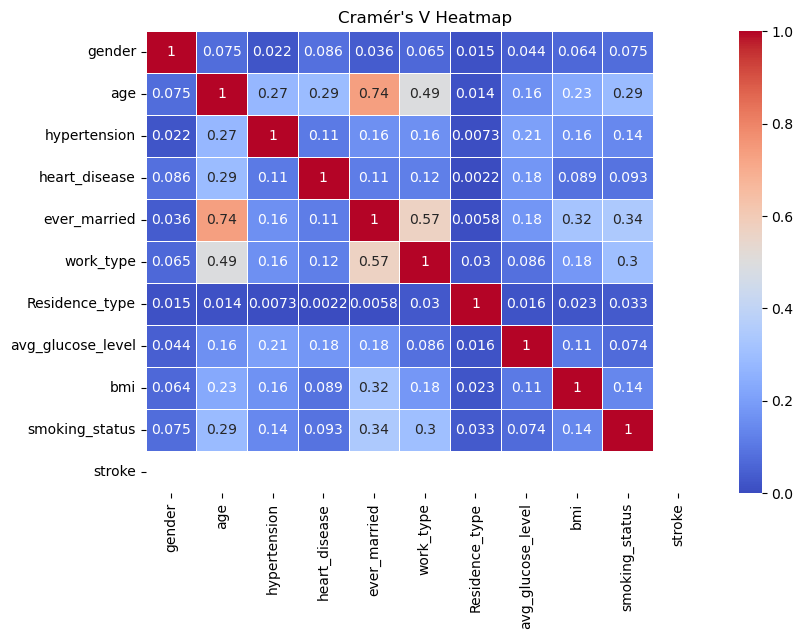

({('gender', 'gender'): 1.0,
  ('Residence_type', 'Residence_type'): 0.9996085097567643,
  ('ever_married', 'ever_married'): 0.999566303827339,
  ('hypertension', 'hypertension'): 0.9988875710996632,
  ('heart_disease', 'heart_disease'): 0.9980849717879993,
  ('ever_married', 'age'): 0.7371134989795833,
  ('ever_married', 'work_type'): 0.5672243899981841,
  ('work_type', 'age'): 0.49254757741630856,
  ('age', 'work_type'): 0.4925475774163085,
  ('smoking_status', 'ever_married'): 0.34238900364036073},
       gender  hypertension  heart_disease  work_type  Residence_type  \
 0          1             0              1          2               1   
 1          0             0              0          3               0   
 2          1             0              1          2               0   
 3          0             0              0          2               1   
 4          0             1              0          3               0   
 ...      ...           ...            ...        ...  

In [251]:
from library.feature_selection import Classification
Classification.cramers_v_analysis(data, target_column='stroke', threshold=0.6, top_n=10, plot=True, figsize=(9,6))

## **So what features should be removed based on the feature selection process?**

- > **On the X vs X** (multicollinearity) test, 'ever_married' and 'age' had a multicollinearity score of 0.74
- > However, both features are significant against the target variable, therefore actual testing will be performed to determine which feature should be removed.
---
- > **On the X vs Y** test using Chi Square Test the following features were deemed to be insignificant, 
    - Residence_type - 0.298332
    - gender - 0.789549
- > Accuracy testing will be performed to make the final decision for its removal


## **Accuracy Comparison**

Initial Model Creation with SMOTE for Comparison 

In [252]:
from library.model import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

x = data.drop(columns=['stroke'], axis=1)
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,4,0,1,1,2,1,4,2,1
1,0,3,0,0,1,3,0,3,2,2
2,1,4,0,1,1,2,0,1,2,2
3,0,3,0,0,1,2,1,3,2,3
4,0,4,1,0,1,3,0,3,1,2


In [253]:
y = data['stroke']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

### **Balancing the data**

In [254]:
x_smote, y_smote = balance_data(x, y)

# X with feature selection
x_smote_noEverMarried = x_smote.drop(['ever_married'], axis=1)
x_smote_noAge = x_smote.drop(['age'], axis=1)
x_smote_noGender = x_smote.drop(['gender'], axis=1)


### **Decision Trees**

In [255]:
decision_tree_model = DecisionTreeClassifier(random_state=42);

tabulize_model_results(decision_tree_model, "Decision Tree", x_smote, y_smote )

,Accuracy,F1-score,Precision,Mean Squared Error,Mean Absolute Error
Decision Tree,0.867866,0.867527,0.871911,0.132134,0.132134


In [256]:
tabulize_model_results(decision_tree_model, "Decision Tree (no ever_married)", x_smote_noEverMarried, y_smote )

,Accuracy,F1-score,Precision,Mean Squared Error,Mean Absolute Error
Decision Tree (no ever_married),0.862211,0.861635,0.868639,0.137789,0.137789


In [257]:
tabulize_model_results(decision_tree_model, "Decision Tree (no age)", x_smote_noAge, y_smote )

,Accuracy,F1-score,Precision,Mean Squared Error,Mean Absolute Error
Decision Tree (no age),0.794859,0.794265,0.798528,0.205141,0.205141


### **Random Forest**

In [258]:
random_forest_model = RandomForestClassifier(random_state=42);
tabulize_model_results(random_forest_model,"Random Forest", x_smote, y_smote,)

,Accuracy,F1-score,Precision,Mean Squared Error,Mean Absolute Error
Random Forest,0.869923,0.869502,0.875022,0.130077,0.130077


In [259]:
tabulize_model_results(random_forest_model,"Random Forest (no ever_married)", x_smote_noEverMarried, y_smote,)

,Accuracy,F1-score,Precision,Mean Squared Error,Mean Absolute Error
Random Forest (no ever_married),0.861183,0.860526,0.868433,0.138817,0.138817


In [260]:
tabulize_model_results(random_forest_model,"Random Forest (no age)", x_smote_noAge, y_smote,)

,Accuracy,F1-score,Precision,Mean Squared Error,Mean Absolute Error
Random Forest (no age),0.792288,0.791054,0.799687,0.207712,0.207712


In [261]:
tabulize_model_results(random_forest_model,"Random Forest (no gender)", x_smote_noGender, y_smote,)

,Accuracy,F1-score,Precision,Mean Squared Error,Mean Absolute Error
Random Forest (no gender),0.850386,0.850166,0.852626,0.149614,0.149614


### **Support Vector Machines (SVM)**

In [262]:
svm_model = SVC(random_state=42);
tabulize_model_results(svm_model, "Support Vector Machines", x_smote, y_smote)

,Accuracy,F1-score,Precision,Mean Squared Error,Mean Absolute Error
Support Vector Machines,0.762468,0.762414,0.762772,0.237532,0.237532


In [263]:
tabulize_model_results(svm_model, "Support Vector Machines (no ever_married)", x_smote_noEverMarried, y_smote)

,Accuracy,F1-score,Precision,Mean Squared Error,Mean Absolute Error
Support Vector Machines (no ever_married),0.756298,0.756198,0.756804,0.243702,0.243702


In [264]:
tabulize_model_results(svm_model, "Support Vector Machines (no age)", x_smote_noAge, y_smote)

,Accuracy,F1-score,Precision,Mean Squared Error,Mean Absolute Error
Support Vector Machines (no age),0.707969,0.70667,0.711974,0.292031,0.292031


## **Conclusion**

### Random Forest had the highest accuracy rate of **86.99%** without feature selection
- > F1-score: **0.869502**
- > Precision: **0.875022**
- > Mean Squared Error: **0.130077**	
- > Mean Absolute Error: **0.130077**
### Applying feature selection made all models decrease in accuracy	